In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('GroceryStoreDataSet.csv',names=['product'],header=None)
df

,product
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [3]:
df.shape

(20, 1)

In [4]:
df.values

array([['MILK,BREAD,BISCUIT'],
       ['BREAD,MILK,BISCUIT,CORNFLAKES'],
       ['BREAD,TEA,BOURNVITA'],
       ['JAM,MAGGI,BREAD,MILK'],
       ['MAGGI,TEA,BISCUIT'],
       ['BREAD,TEA,BOURNVITA'],
       ['MAGGI,TEA,CORNFLAKES'],
       ['MAGGI,BREAD,TEA,BISCUIT'],
       ['JAM,MAGGI,BREAD,TEA'],
       ['BREAD,MILK'],
       ['COFFEE,COKE,BISCUIT,CORNFLAKES'],
       ['COFFEE,COKE,BISCUIT,CORNFLAKES'],
       ['COFFEE,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,COKE'],
       ['BREAD,SUGER,BISCUIT'],
       ['COFFEE,SUGER,CORNFLAKES'],
       ['BREAD,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,SUGER'],
       ['BREAD,COFFEE,SUGER'],
       ['TEA,MILK,COFFEE,CORNFLAKES']], dtype=object)

In [6]:
data=list(df['product'].apply(lambda x: x.split(',')))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COKE'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [7]:
#pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [8]:
from mlxtend.preprocessing import TransactionEncoder

In [9]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COFFEE,COKE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [10]:
df.sum()

BISCUIT        7
BOURNVITA      4
BREAD         13
COFFEE         8
COKE           3
CORNFLAKES     6
JAM            2
MAGGI          5
MILK           5
SUGER          6
TEA            7
dtype: int64

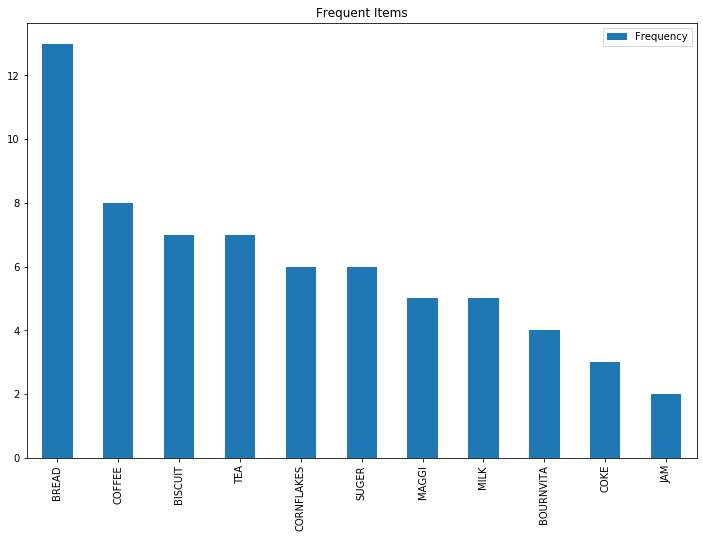

In [11]:
import matplotlib.pyplot as plt

df.sum().to_frame('Frequency').sort_values('Frequency',ascending=False).plot(kind="bar",
                                                                           figsize=(12,8),
                                                                           title="Frequent Items")

plt.show()

From the above anaylsis we can see Bread is most frequent item selling and jam is the least selling item

In [12]:
df.shape[1]

11

In [13]:
df.shape[0]

20

In [17]:
## Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0],columns = ["Support"]).sort_values("Support",ascending=False)
first

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COKE,0.15


In [19]:
# Elimination by support value
first[first.Support >=0.30]

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30


In [20]:
import itertools

In [21]:
# DEMO
second = list(itertools.combinations(first.index,2))
second =[list(i) for i in second]
# sample of  combinations
second

[['BREAD', 'COFFEE'],
 ['BREAD', 'BISCUIT'],
 ['BREAD', 'TEA'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'BOURNVITA'],
 ['BREAD', 'COKE'],
 ['BREAD', 'JAM'],
 ['COFFEE', 'BISCUIT'],
 ['COFFEE', 'TEA'],
 ['COFFEE', 'CORNFLAKES'],
 ['COFFEE', 'SUGER'],
 ['COFFEE', 'MAGGI'],
 ['COFFEE', 'MILK'],
 ['COFFEE', 'BOURNVITA'],
 ['COFFEE', 'COKE'],
 ['COFFEE', 'JAM'],
 ['BISCUIT', 'TEA'],
 ['BISCUIT', 'CORNFLAKES'],
 ['BISCUIT', 'SUGER'],
 ['BISCUIT', 'MAGGI'],
 ['BISCUIT', 'MILK'],
 ['BISCUIT', 'BOURNVITA'],
 ['BISCUIT', 'COKE'],
 ['BISCUIT', 'JAM'],
 ['TEA', 'CORNFLAKES'],
 ['TEA', 'SUGER'],
 ['TEA', 'MAGGI'],
 ['TEA', 'MILK'],
 ['TEA', 'BOURNVITA'],
 ['TEA', 'COKE'],
 ['TEA', 'JAM'],
 ['CORNFLAKES', 'SUGER'],
 ['CORNFLAKES', 'MAGGI'],
 ['CORNFLAKES', 'MILK'],
 ['CORNFLAKES', 'BOURNVITA'],
 ['CORNFLAKES', 'COKE'],
 ['CORNFLAKES', 'JAM'],
 ['SUGER', 'MAGGI'],
 ['SUGER', 'MILK'],
 ['SUGER', 'BOURNVITA'],
 ['SUGER', 'COKE'],
 ['SUGER', 'JA

In [22]:
from mlxtend.frequent_patterns import apriori

In [23]:
pd.set_option("display.max_rows",None)

In [24]:
df1=apriori(df,min_support=0.01,use_colnames=True)
df1

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.15,(COKE)
5,0.30,(CORNFLAKES)
6,0.10,(JAM)
7,0.25,(MAGGI)
8,0.25,(MILK)
9,0.30,(SUGER)


In [25]:
df1.sort_values(by="support",ascending=False)

,support,itemsets
2,0.65,(BREAD)
3,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
9,0.30,(SUGER)
7,0.25,(MAGGI)
8,0.25,(MILK)
34,0.20,"(SUGER, COFFEE)"
28,0.20,"(BREAD, MILK)"


In [26]:
df1['length']=df1['itemsets'].apply(lambda x:len(x))
df1

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.40,(COFFEE),1
4,0.15,(COKE),1
5,0.30,(CORNFLAKES),1
6,0.10,(JAM),1
7,0.25,(MAGGI),1
8,0.25,(MILK),1
9,0.30,(SUGER),1


In [27]:
df1[(df1['length']==2) & (df1['support']>=0.15)]

,support,itemsets,length
11,0.20,"(BREAD, BISCUIT)",2
14,0.15,"(BISCUIT, CORNFLAKES)",2
19,0.15,"(BREAD, BOURNVITA)",2
23,0.15,"(BREAD, COFFEE)",2
27,0.15,"(BREAD, MAGGI)",2
28,0.20,"(BREAD, MILK)",2
29,0.20,"(BREAD, SUGER)",2
30,0.20,"(BREAD, TEA)",2
31,0.15,"(COKE, COFFEE)",2
32,0.20,"(CORNFLAKES, COFFEE)",2


In [28]:
from mlxtend.frequent_patterns import association_rules

In [30]:
# association Rules & info 
df_ar= association_rules(df1,metric="confidence",min_threshold =0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
1,(COKE),(BISCUIT),0.15,0.35,0.10,0.666667,1.904762,0.0475,1.950000,0.558824
2,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000,0.428571
3,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000,0.166667
4,(BOURNVITA),(SUGER),0.20,0.30,0.10,0.500000,1.666667,0.0400,1.400000,0.500000
5,(BOURNVITA),(TEA),0.20,0.35,0.10,0.500000,1.428571,0.0300,1.300000,0.375000
6,(JAM),(BREAD),0.10,0.65,0.10,1.000000,1.538462,0.0350,inf,0.388889
7,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000,-0.100000
8,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750000,0.250000
9,(SUGER),(BREAD),0.30,0.65,0.20,0.666667,1.025641,0.0050,1.050000,0.035714


In [31]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.60)].sort_values("confidence",ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75,0.250000
21,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25,0.750000
9,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05,0.035714
12,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
14,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429


In [33]:
df_lift=association_rules(df1,metric ="lift",min_threshold=1)
#displaying results with lift >=1
df_lift.sort_values(by = 'lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
227,"(MILK, MAGGI)","(BREAD, JAM)",0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368
253,"(MILK, COFFEE)","(TEA, CORNFLAKES)",0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368
220,"(BREAD, MILK, MAGGI)",(JAM),0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368
173,(JAM),"(MILK, MAGGI)",0.10,0.05,0.05,0.500000,10.000000,0.0450,1.900000,1.000000
233,(JAM),"(BREAD, MILK, MAGGI)",0.10,0.05,0.05,0.500000,10.000000,0.0450,1.900000,1.000000
187,"(MILK, BISCUIT)","(BREAD, CORNFLAKES)",0.10,0.05,0.05,0.500000,10.000000,0.0450,1.900000,1.000000
186,"(BREAD, CORNFLAKES)","(MILK, BISCUIT)",0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368
168,"(MILK, MAGGI)",(JAM),0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368
211,"(BISCUIT, COFFEE)","(CORNFLAKES, COKE)",0.10,0.10,0.10,1.000000,10.000000,0.0900,inf,1.000000
254,"(MILK, CORNFLAKES)","(TEA, COFFEE)",0.10,0.05,0.05,0.500000,10.000000,0.0450,1.900000,1.000000


In [35]:
df_lift=association_rules(df1,metric ="lift",min_threshold=0)
#displaying results with lift >=0
#df_lift[df_lift['lift']<1]--------------------------dont know (it will take value from 0 to 1 btw, example 0.3)
df_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BREAD),(BISCUIT),0.65,0.35,0.20,0.307692,0.879121,-0.0275,0.938889,-0.282051
1,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
2,(BISCUIT),(COFFEE),0.35,0.40,0.10,0.285714,0.714286,-0.0400,0.840000,-0.380952
3,(COFFEE),(BISCUIT),0.40,0.35,0.10,0.250000,0.714286,-0.0400,0.866667,-0.400000
4,(BISCUIT),(COKE),0.35,0.15,0.10,0.285714,1.904762,0.0475,1.190000,0.730769
5,(COKE),(BISCUIT),0.15,0.35,0.10,0.666667,1.904762,0.0475,1.950000,0.558824
6,(BISCUIT),(CORNFLAKES),0.35,0.30,0.15,0.428571,1.428571,0.0450,1.225000,0.461538
7,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000,0.428571
8,(BISCUIT),(MAGGI),0.35,0.25,0.10,0.285714,1.142857,0.0125,1.050000,0.192308
9,(MAGGI),(BISCUIT),0.25,0.35,0.10,0.400000,1.142857,0.0125,1.083333,0.166667
